# Loan Approval Prediction - Model Workflow
This notebook includes data preprocessing, training, evaluation, scenario testing, and regression analysis for the RuizLoans dataset.

In [1]:
#Libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# Cleaning Data Previously Done

Correlation Matrix:
                  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x
CNT_CHILDREN          1.000000         -0.056023      0.276108
AMT_INCOME_TOTAL     -0.056023          1.000000     -0.142754
AMT_CREDIT_x          0.276108         -0.142754      1.000000


<Figure size 1000x800 with 0 Axes>

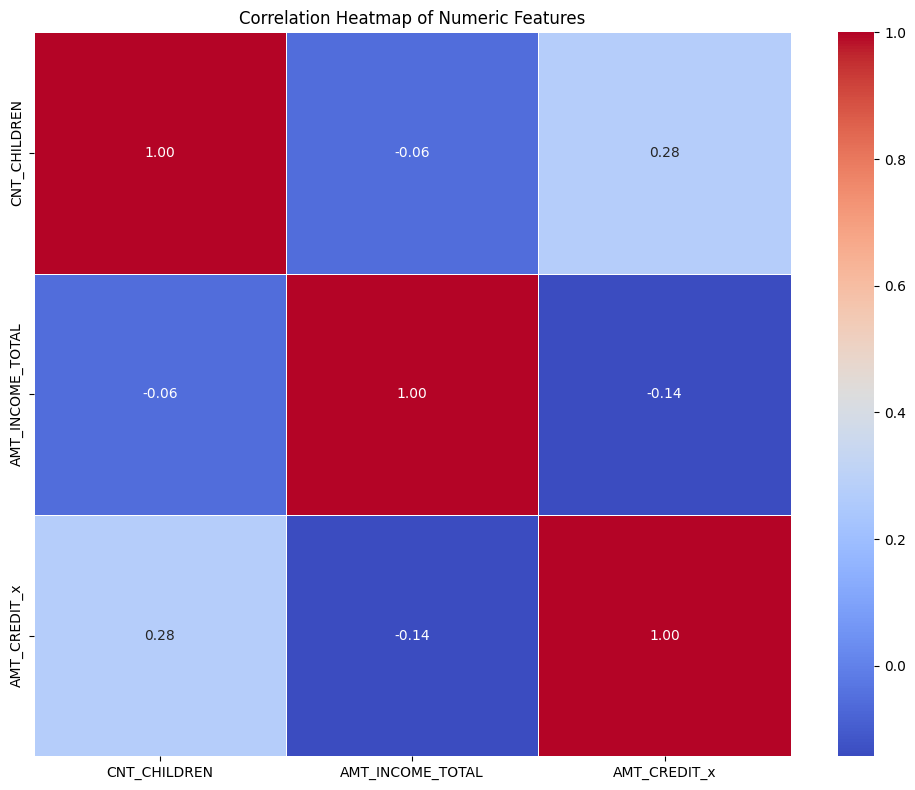

In [2]:
#HeatMap
# Heatmap of Numeric Feature Correlations

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data_path = r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\Data\data_merged.csv'
df = pd.read_csv(data_path)

features = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE_x', 'NAME_FAMILY_STATUS',
    'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x'
]

df = df[~df['NAME_CONTRACT_STATUS'].isin(['Refused', 'Unused offer'])]
df = df.dropna(subset=['NAME_CONTRACT_STATUS'] + features)




plt.figure(figsize=(10, 8))

# Compute correlation matrix only for numeric columns
numeric_corr = df[features].select_dtypes(include=[np.number]).corr()

print("Correlation Matrix:")
print(numeric_corr)



plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()

# Save BEFORE showing
plt.savefig(r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\correlation_heatmap.png')

# Now show it
plt.show()



#children is not a significant factor across amt of income total or amt of credit.

Intercept: 119957.35
Coefficient: -0.2164
R-squared: 0.0204


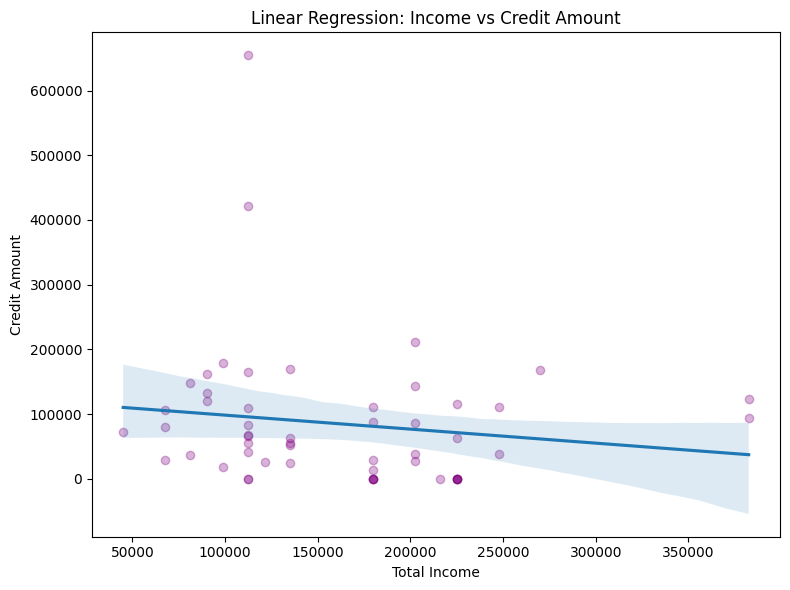

In [ ]:

# Linear Regression Income Total and Amt Credit
from sklearn.metrics import r2_score

df_reg = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT_x']].dropna()
X_reg = df_reg[['AMT_INCOME_TOTAL']]
y_reg = df_reg['AMT_CREDIT_x']

reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)

# Predict and calculate R-squared
y_pred = reg_model.predict(X_reg)
r2 = r2_score(y_reg, y_pred)

# Print results
print(f"Intercept: {reg_model.intercept_:.2f}")
print(f"Coefficient: {reg_model.coef_[0]:.4f}")
print(f"R-squared: {r2:.4f}") 

# Plot
plt.figure(figsize=(8, 6))
sns.regplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT_x', data=df_reg,
            scatter_kws={'alpha': 0.3, 'color': 'purple'})
plt.title('Linear Regression: Income vs Credit Amount')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.tight_layout()

plt.savefig("income_vs_credit_regression.png", dpi=300)
plt.show()


suggests that higher income is associated with slightly lower credit amounts, very small effect

R-squared: 0.0204 or 2.04% of variation is from the income, meaning a weak linear relationship. Not a good indicator

Intercept: 0.9865
Coefficient: -0.000001
R-squared: 0.0495


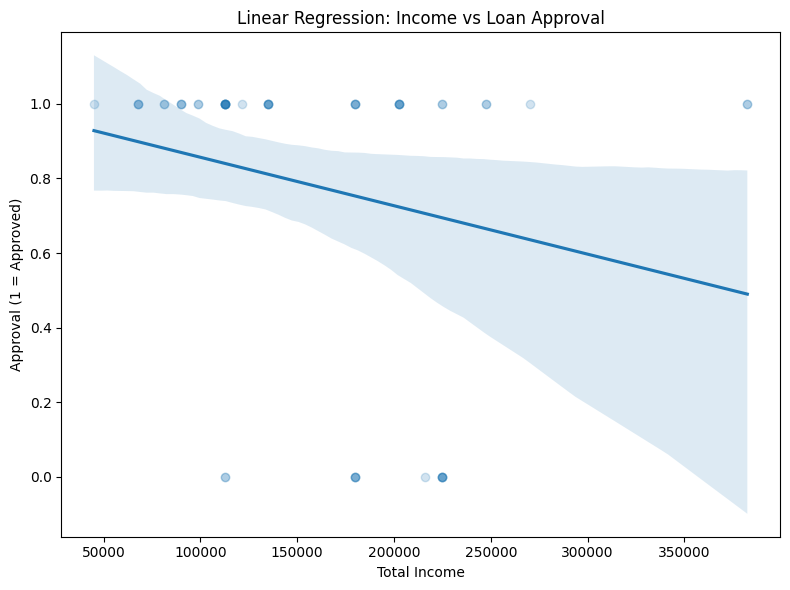

In [4]:
# Linear Regression Income Amt Total and Loan Approval

import pandas as pd

data_path = r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\Data\data_merged.csv'
df = pd.read_csv(data_path)

# Optional: filter as you did before
df = df[~df['NAME_CONTRACT_STATUS'].isin(['Refused', 'Unused offer'])]


df_bin = df[['AMT_INCOME_TOTAL', 'NAME_CONTRACT_STATUS']].dropna()
df_bin['APPROVED_FLAG'] = (df_bin['NAME_CONTRACT_STATUS'] == 'Approved').astype(int)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

X = df_bin[['AMT_INCOME_TOTAL']]
y = df_bin['APPROVED_FLAG']

reg_model = LinearRegression()
reg_model.fit(X, y)

print(f"Intercept: {reg_model.intercept_:.4f}")
print(f"Coefficient: {reg_model.coef_[0]:.6f}")

# R-squared
y_pred = reg_model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(8, 6))
sns.regplot(x='AMT_INCOME_TOTAL', y='APPROVED_FLAG', data=df_bin, scatter_kws={'alpha': 0.2})
plt.title('Linear Regression: Income vs Loan Approval')
plt.xlabel('Total Income')
plt.ylabel('Approval (1 = Approved)')
plt.tight_layout()
plt.savefig("IncomeAmt_vs_LoanApproval.png", dpi=300)

plt.show()


Coefficient: -0.000001 meaning income is not a useful predictor for whether a loan is approved.

R-squared: 0.0495 or 4.95% meaning other variables are likely much more important in predicting loan approval.

In [ ]:
#Features Importance:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


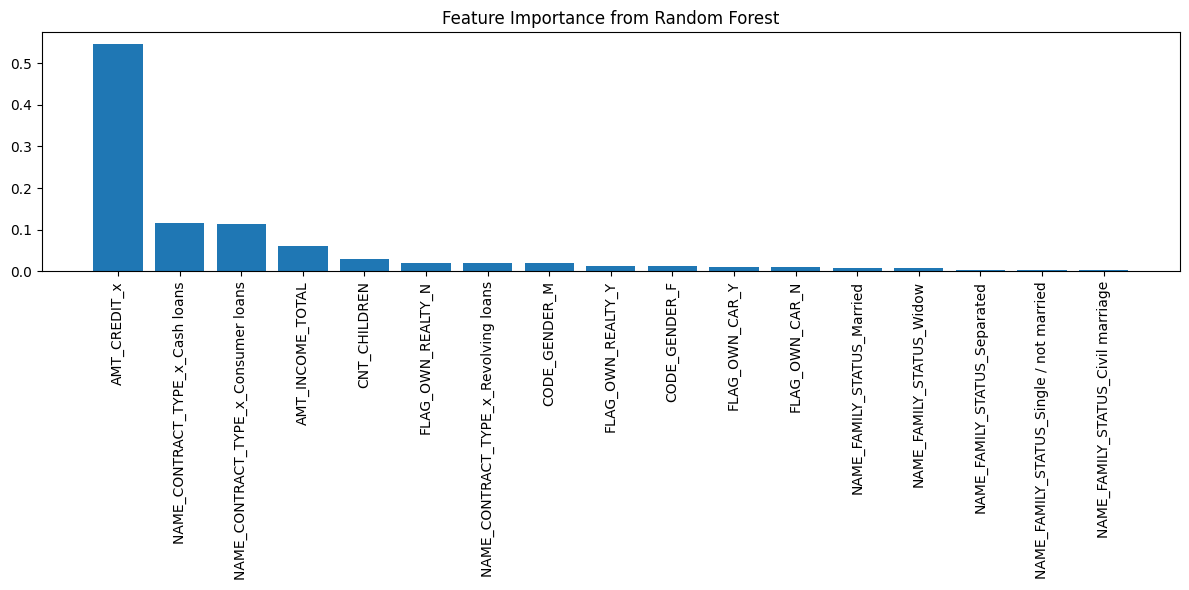

In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# x=feature, y=target
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for plotting
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.savefig("feature_importance_rf.png", dpi=300)
plt.show()


Amot of Credit is the Most Infulential Feature.


Classification Report:
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00         9
    Canceled       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11


Confusion Matrix:
[[9 0]
 [0 2]]
Scenario 1 probabilities: {Approved: 0.87, Canceled: 0.13}
Scenario 1 final decision based on threshold 0.8: Approved

Scenario 2 probabilities: {Approved: 0.82, Canceled: 0.18}
Scenario 2 final decision based on threshold 0.8: Approved

Scenario 3 probabilities: {Approved: 0.84, Canceled: 0.16}
Scenario 3 final decision based on threshold 0.8: Approved

Scenario 4 probabilities: {Approved: 0.85, Canceled: 0.15}
Scenario 4 final decision based on threshold 0.8: Approved

Scenario 5 probabilities: {Approved: 0.72, Canceled: 0.28}
Scenario 5 final decision based on threshold 0.8: Not Approved

Scenario 6 proba

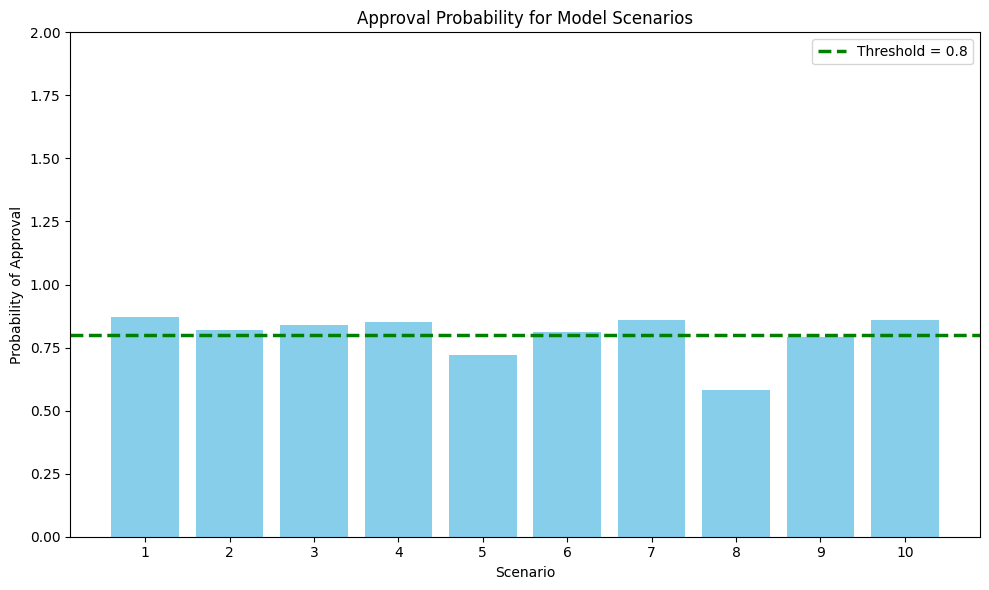

In [4]:
#Random Forest Classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



# Load merged data
data_path = r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\Data\data_merged.csv'
df = pd.read_csv(data_path)

# Feature columns
features = [
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_CONTRACT_TYPE_x',
    'NAME_FAMILY_STATUS',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT_x'
]

# Remove 'Refused' class from the dataset
df = df[df['NAME_CONTRACT_STATUS'] != 'Refused']
df = df[df['NAME_CONTRACT_STATUS'] != 'Unused offer']

# Drop rows with missing target or feature data
df = df.dropna(subset=['NAME_CONTRACT_STATUS'] + features)

# Prepare features and target
X = df[features]
y = df['NAME_CONTRACT_STATUS']

# Encode categorical features
X = pd.get_dummies(X)

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Split dataset stratified by target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=range(len(le.classes_)), target_names=le.classes_))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




# Testing with New Data - 10 scenarios
new_applications = pd.DataFrame([
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'Y',
        'FLAG_OWN_REALTY': 'N',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Married',
        'CNT_CHILDREN': 1,
        'AMT_INCOME_TOTAL': 100000,
        'AMT_CREDIT_x': 500000
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Single / not married',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 75000,
        'AMT_CREDIT_x': 300000
    },
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Revolving loans',
        'NAME_FAMILY_STATUS': 'Civil marriage',
        'CNT_CHILDREN': 2,
        'AMT_INCOME_TOTAL': 85000,
        'AMT_CREDIT_x': 400000
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'Y',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Married',
        'CNT_CHILDREN': 3,
        'AMT_INCOME_TOTAL': 120000,
        'AMT_CREDIT_x': 600000
    },
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'Y',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Revolving loans',
        'NAME_FAMILY_STATUS': 'Separated',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 55000,
        'AMT_CREDIT_x': 200000
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'N',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Widow',
        'CNT_CHILDREN': 1,
        'AMT_INCOME_TOTAL': 65000,
        'AMT_CREDIT_x': 250000
    },
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Single / not married',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 70000,
        'AMT_CREDIT_x': 320000
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'N',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Single / not married',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 30000,
        'AMT_CREDIT_x': 50000  
    },
    {
        'CODE_GENDER': 'F',
        'FLAG_OWN_CAR': 'N',
        'FLAG_OWN_REALTY': 'N',
        'NAME_CONTRACT_TYPE_x': 'Revolving loans',
        'NAME_FAMILY_STATUS': 'Separated',
        'CNT_CHILDREN': 0,
        'AMT_INCOME_TOTAL': 25000,
        'AMT_CREDIT_x': 150000 
    },
    {
        'CODE_GENDER': 'M',
        'FLAG_OWN_CAR': 'Y',
        'FLAG_OWN_REALTY': 'Y',
        'NAME_CONTRACT_TYPE_x': 'Cash loans',
        'NAME_FAMILY_STATUS': 'Married',
        'CNT_CHILDREN': 4,
        'AMT_INCOME_TOTAL': 40000,
        'AMT_CREDIT_x': 100000  
    }
])

# Preprocess new input: one-hot encode
new_applications_encoded = pd.get_dummies(new_applications)

# Align columns with training data
for col in X_train.columns:
    if col not in new_applications_encoded.columns:
        new_applications_encoded[col] = 0
new_applications_encoded = new_applications_encoded[X_train.columns]

# Predict probabilities
probs = model.predict_proba(new_applications_encoded)

# Find index of 'Approved'
approved_index = list(le.classes_).index('Approved')

# Set threshold
threshold = 0.80

# Print predictions with threshold
output_path = r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\Data\prediction.txt'



with open(output_path, 'w') as f:
    for i, prob_array in enumerate(probs):
        approved_prob = prob_array[approved_index]
        decision = "Approved" if approved_prob >= threshold else "Not Approved"
        probs_str = ', '.join(f"{cls}: {prob:.2f}" for cls, prob in zip(le.classes_, prob_array))
        
        line1 = f"Scenario {i+1} probabilities: {{{probs_str}}}"
        line2 = f"Scenario {i+1} final decision based on threshold {threshold}: {decision}\n"
        
        print(line1)
        print(line2)
        
        f.write(line1 + '\n')
        f.write(line2 + '\n')
print(f"\n Predictions printed to txt file: {output_path}")


import matplotlib.pyplot as plt

# Get class labels
class_labels = le.classes_

# Extract approval probabilities for each scenario
approved_index = list(class_labels).index('Approved')
approved_probs = [prob[approved_index] for prob in probs]


# Print probability results
for i, prob in enumerate(probs):
    print(f"\nScenario {i+1} Probabilities:")
    for class_idx, class_name in enumerate(le.classes_):
        print(f"{class_name}: {prob[class_idx]*100:.2f}%")


plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), approved_probs, color='skyblue')
plt.axhline(y=threshold, color='green', linestyle='--', linewidth=2.5, label=f'Threshold = {threshold}')
plt.title('Approval Probability for Model Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Probability of Approval')
plt.xticks(range(1, 11))
plt.ylim(0, 2)  # Extended y-axis range
plt.legend()
plt.tight_layout()
plt.savefig(r'C:\Users\19564\Documents\CapstoneSR\RuizLoans\scenario_approval_probs.png')
plt.show()



     

 


    



7 Passed threshold of 80% and were approved. The classification report shows tested on 11 data points and 9 were approved which is strong and accurate.

Logistic Regression Report:
              precision    recall  f1-score   support

    Approved       0.67      1.00      0.80         2
    Canceled       1.00      0.89      0.94         9

    accuracy                           0.91        11
   macro avg       0.83      0.94      0.87        11
weighted avg       0.94      0.91      0.92        11

Confusion Matrix:
[[2 0]
 [1 8]]
ROC AUC Score: 1.00


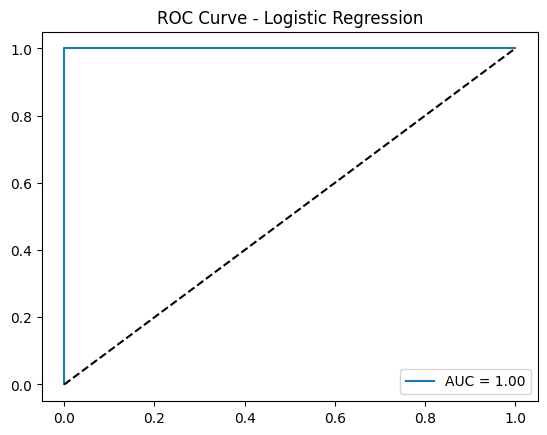

,Feature,Coefficient
1,AMT_CREDIT_x,1.582628e-03
4,NAME_FAMILY_STATUS_Single / not married,1.115808e-08
2,NAME_FAMILY_STATUS_Married,4.716680e-09
3,NAME_FAMILY_STATUS_Separated,-5.312455e-09
5,NAME_FAMILY_STATUS_Widow,-2.399736e-08
0,AMT_INCOME_TOTAL,-1.398266e-04


In [ ]:
#Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_log_pred = log_model.predict(X_test)
y_log_probs = log_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Report:")
print(classification_report(y_test, y_log_pred, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_log_pred))

roc_auc = roc_auc_score(y_test, y_log_probs)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_log_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# Coefficient summary
pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)


The F1 score was .80 for approved and .94 for canceled or not approved which is strong for recall and precision. The 91% accuracy is good, means the model is predicting approval scenarios correctly. The ROC curve is at 1 which also supports correct predictions.The feature results indicate the Amt of Credit is still the highest contributor to loan approval at 1.58 compared to other lower factors and negative values like family status. 
Random Forest classifer prediction result was at 86 percent approval while the Logistic Regression approved loans at 91 percent accuracy. Both are very close to each other, showing the model did well at predicting loans overall

